### Semantic Distance

In [1]:
! pip install gensim
! pip install nltk

In [2]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import os

In [3]:
os.getcwd()

'/Users/liyutai/Desktop/MACS 30200/project'

In [4]:
ll_df = pd.read_csv("MIT_ImageRatings.csv")

In [5]:
hl_df = pd.read_csv("image_label.csv")

In [6]:
ll_df.head()

,image_name,Hue,Sat,Lum,sdHue,sdSat,sdBright,Entropy,LRSymm,UDSymm,SED,NSED,ED,Order,Natural,Habitable,Preference
0,5290333715_fbe95626ae_o.jpg,0.123053,0.280524,0.465580,0.197126,0.216424,0.275851,7.434824,0.005822,0.004986,0.121669,0.008589,0.096019,1.00,2.17,2.93,1.53
1,4357587050_d09069f341_o.jpg,0.276483,0.254353,0.566156,0.278846,0.294493,0.270801,6.177281,0.008411,0.007431,0.077890,0.034188,0.100465,1.06,2.00,1.59,1.74
2,sun_audijvtzzhgkrybg.jpg,0.278962,0.202144,0.497832,0.259493,0.157821,0.232531,7.738311,0.010022,0.008939,0.059931,0.102152,0.134441,1.07,2.04,2.10,1.95
3,sun_ajjodogkvthozlni.jpg,0.378697,0.205623,0.475785,0.220284,0.194211,0.314798,7.733583,0.008954,0.008261,0.086321,0.079031,0.123857,1.09,1.16,2.08,1.26
4,sun_dgqyeayssxdxcaim.jpg,0.389366,0.175528,0.538711,0.344595,0.135950,0.194159,7.118987,0.009003,0.003885,0.040296,0.077255,0.111384,1.12,1.85,2.81,1.61


In [7]:
hl_df.head()

,image_name,labels
0,2755860336_126b78842a_o.jpg,"['Plant(96.71%)', 'Building(96.41%)', 'Window(..."
1,5005678830_2e45739d41_o.jpg,"['Plant(97.29%)', 'Sky(96.57%)', 'Building(96...."
2,sun_bggixrgemhvuewkc.jpg,"['Plant(96.76%)', 'Building(96.48%)', 'Car(95...."
3,sun_arkbrhiinafdbhrw.jpg,"['Plant(96.95%)', 'Plant community(93.29%)', '..."
4,sun_blplndgggpunourm.jpg,"['Water(98.00%)', 'Plant(96.93%)', 'Water reso..."


In [8]:
dataframe = ll_df.join(hl_df.set_index('image_name'), on='image_name')

In [9]:
dataframe = dataframe[['image_name', 'Natural', 'labels']]

In [10]:
dataframe

,image_name,Natural,labels
0,5290333715_fbe95626ae_o.jpg,2.17,"['Building(94.69%)', 'Daytime(94.46%)', 'Prope..."
1,4357587050_d09069f341_o.jpg,2.00,"['Building(95.83%)', 'Window(94.71%)', 'Proper..."
2,sun_audijvtzzhgkrybg.jpg,2.04,"['Daytime(94.42%)', 'Property(94.33%)', 'Sky(9..."
3,sun_ajjodogkvthozlni.jpg,1.16,"['Sky(95.29%)', 'Building(92.38%)', 'Urban des..."
4,sun_dgqyeayssxdxcaim.jpg,1.85,"['Sky(95.24%)', 'Cloud(93.56%)', 'Wood(85.84%)..."
...,...,...,...
1100,sun_alewbcnalibklcwh.jpg,2.08,[]
1101,sun_aphsqddlotnzlzvk.jpg,1.76,"['Cloud(96.74%)', 'Sky(96.56%)', 'Building(94...."
1102,sun_abrrtrlvdghzzuxz.jpg,1.40,NaN
1103,sun_bvgfkvcwscgrhenm.jpg,1.23,"['Bookcase(95.80%)', 'Furniture(95.16%)', 'Tab..."


In [11]:
dataframe.isnull().sum()

image_name     0
Natural        0
labels        75
dtype: int64

In [12]:
miss_val = pd.isnull(dataframe['labels'])

In [13]:
dataframe[miss_val]

,image_name,Natural,labels
214,sun_abnxhmmesrvgqazg.jpg,2.61,NaN
224,sun_aglpxonwfoqtmeub.jpg,6.79,NaN
239,sun_bbpefokgivhwzglh.jpg,1.58,NaN
272,sun_bccjpnbmxhyfptmc.jpg,2.60,NaN
274,sun_bbzwbfgqadhzqhqf.jpg,6.00,NaN
...,...,...,...
1076,sun_byyoeixlskdvtnxu.jpg,1.70,NaN
1081,sun_badbdepxqipklvvf.jpg,6.93,NaN
1085,labelme_cwyzvggchetltzv.jpg,1.71,NaN
1097,sun_aaqeqhpbmudvvcdj.jpg,1.50,NaN


In [14]:
clean_df = dataframe[pd.notnull(dataframe['labels'])]

In [15]:
len(clean_df)

1030

In [16]:
clean_df[clean_df['labels'] == "[]"]

,image_name,Natural,labels
199,4463022243_8881fc7bda_o.jpg,1.47,[]
259,sun_bvnbbmftbvgjxxnf.jpg,6.42,[]
655,sun_bewlahslhahuvzjt.jpg,6.90,[]
960,sun_bdtmmtsvfiwkcdfh.jpg,1.12,[]
1059,sun_bkdzqjanktzjkvjb.jpg,4.28,[]
1100,sun_alewbcnalibklcwh.jpg,2.08,[]


In [17]:
clean_df2 = clean_df[clean_df['labels'] != "[]"]

In [18]:
clean_df2.head()

,image_name,Natural,labels
0,5290333715_fbe95626ae_o.jpg,2.17,"['Building(94.69%)', 'Daytime(94.46%)', 'Prope..."
1,4357587050_d09069f341_o.jpg,2.00,"['Building(95.83%)', 'Window(94.71%)', 'Proper..."
2,sun_audijvtzzhgkrybg.jpg,2.04,"['Daytime(94.42%)', 'Property(94.33%)', 'Sky(9..."
3,sun_ajjodogkvthozlni.jpg,1.16,"['Sky(95.29%)', 'Building(92.38%)', 'Urban des..."
4,sun_dgqyeayssxdxcaim.jpg,1.85,"['Sky(95.24%)', 'Cloud(93.56%)', 'Wood(85.84%)..."


In [19]:
len(clean_df2.loc[0]['labels'].split(","))

10

In [20]:
dataframe = clean_df2[:]
for x in range(len(dataframe)):
    dataframe['num_label'] = len(dataframe.iloc[x]['labels'].split(","))

<ipython-input-20-28bb8b0ee409>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['num_label'] = len(dataframe.iloc[x]['labels'].split(","))


In [21]:
dataframe['num_label'].value_counts()

10    1024
Name: num_label, dtype: int64

In [22]:
dataframe['labels'][0]

"['Building(94.69%)', 'Daytime(94.46%)', 'Property(94.19%)', 'Window(93.62%)', 'Fixture(89.73%)', 'Rectangle(89.13%)', 'Wood(87.84%)', 'Brickwork(84.52%)', 'Brick(81.78%)', 'Material property(80.02%)']"

In [23]:
dataframe['labels'] = dataframe.labels.apply(lambda x: x[1:-1].split(','))

<ipython-input-23-6b1ef56223ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['labels'] = dataframe.labels.apply(lambda x: x[1:-1].split(','))


In [24]:
dataframe['labels'][9]

["'Plant(96.86%)'",
 " 'Sky(95.66%)'",
 " 'Window(93.54%)'",
 " 'Building(93.38%)'",
 " 'Natural landscape(87.61%)'",
 " 'Tree(86.92%)'",
 " 'Wood(86.53%)'",
 " 'Land lot(84.65%)'",
 " 'Cottage(82.20%)'",
 " 'Grass(81.34%)'"]

In [73]:
np.median(dataframe['Natural'])

4.845

In [75]:
nature = dataframe[dataframe['Natural'] >= 4.845]
urban = dataframe[dataframe['Natural'] < 4.845]

In [76]:
nature.head()

,image_name,Natural,labels,num_label,image_vec
117,sun_aexrahannecqdkfz.jpg,5.65,"['Plant(94.23%)', 'Tree(88.47%)', 'Natural l...",10,"[8.082804463832872, -7.240915611386299, -42.49..."
118,sun_bkueaxewlzijtzmy.jpg,6.30,"['Plant community(93.05%)', 'Plant(92.89%)', ...",10,"[8.047585733846063, -6.94417726714164, -42.903..."
150,sun_bhzexsxsxhcodhaj.jpg,6.84,"['Plant(93.59%)', 'Tree(86.75%)', 'Terrestri...",10,"[10.391329474077793, -5.853386136703193, -59.8..."
159,sun_bcduirgbwfrrefxx.jpg,6.94,"['Cloud(97.26%)', 'Sky(97.08%)', 'Mountain(8...",10,"[11.443270297866547, -9.510876868851483, -65.0..."
162,sun_bqkcqwvhefnkcinz.jpg,6.71,"['Plant(95.85%)', 'Tree(89.92%)', 'Natural l...",10,"[11.486757090809988, -9.894744149409235, -66.4..."


In [77]:
nature['labels'].count()

512

In [25]:
import gensim.downloader as api
path = api.load("word2vec-google-news-300", return_path=True)
print(path)

/Users/liyutai/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [26]:
import re
txt = ",".join(dataframe['labels'][25])
txt
# bool(re.search(r"[a-zA-Z]+\s[a-zA-Z]+", txt))
# re.findall(r"\d\d.\d\d",txt)
# re.findall(r"[a-zA-Z]+",txt)
re.findall(r"[a-zA-Z\s]+", txt)

['Water',
 ' ',
 'Window',
 ' ',
 'Branch',
 ' ',
 'Tree',
 ' ',
 'Watercourse',
 ' ',
 'Body of water',
 ' ',
 'Atmospheric phenomenon',
 ' ',
 'House',
 ' ',
 'Fluvial landforms of streams',
 ' ',
 'Freezing']

In [27]:
dataframe.iloc[603]['labels']

["'Cloud(97.94%)'",
 " 'Sky(94.59%)'",
 " 'Cumulus(78.92%)'",
 " 'Calm(73.97%)'",
 " 'Meteorological phenomenon(68.10%)'",
 " 'Electric blue(64.97%)'"]

In [80]:
def get_label_list(dataframe):
    all_label = []
    for word_list in dataframe['labels'].values:
    #     print(word_list)
        for word in word_list:
            if bool(re.search(r"[a-zA-Z]+[^a-zA-Z0-9_][a-zA-Z]+", word)):
    #             print(word)
                label = re.findall(r"[a-zA-Z\s-]+", word)
                for x in label:
                    if x != " ":
                        all_label.append(x)
            else:
                labels = re.findall(r"[a-zA-Z]+", word)
    #             print(labels)
                all_label.extend(labels)
    
    return all_label

# print(len(all_label))
   

In [82]:
all_label = get_label_list(dataframe)
len(all_label)

10236

In [83]:
natural_label = get_label_list(nature)
urban_label = get_label_list(urban)

In [86]:
unique_nature = set(natural_label)
len(unique_nature)

200

In [87]:
unique_urban = set(urban_label)
len(unique_urban)

242

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
ct_vec = CountVectorizer()
X = ct_vec.fit_transform(all_label)
X.shape

(10236, 361)

In [30]:
unique_label = set(all_label)
len(unique_label)

341

In [31]:
from collections import Counter
c = Counter(all_label)
d_label = dict((k, v) for k, v in sorted(c.items()) if v >= 100)
sorted_label = {}
sorted_keys = sorted(d_label, key=d_label.get, reverse=True)  # [1, 3, 2]
for w in sorted_keys:
    sorted_label[w] = d_label[w]
sorted_label

{'Sky': 795,
 'Plant': 666,
 'Natural landscape': 556,
 'Tree': 515,
 'Cloud': 396,
 'Building': 387,
 'Window': 324,
 'Grass': 274,
 'Landscape': 259,
 'Mountain': 241,
 'Wood': 219,
 'Water': 184,
 'House': 181,
 'Land lot': 177,
 'Plant community': 135,
 'Terrestrial plant': 124,
 'Bedrock': 119,
 'Terrain': 116,
 'Formation': 105}

Text(0.9, 0.15, 'label frequency plot')

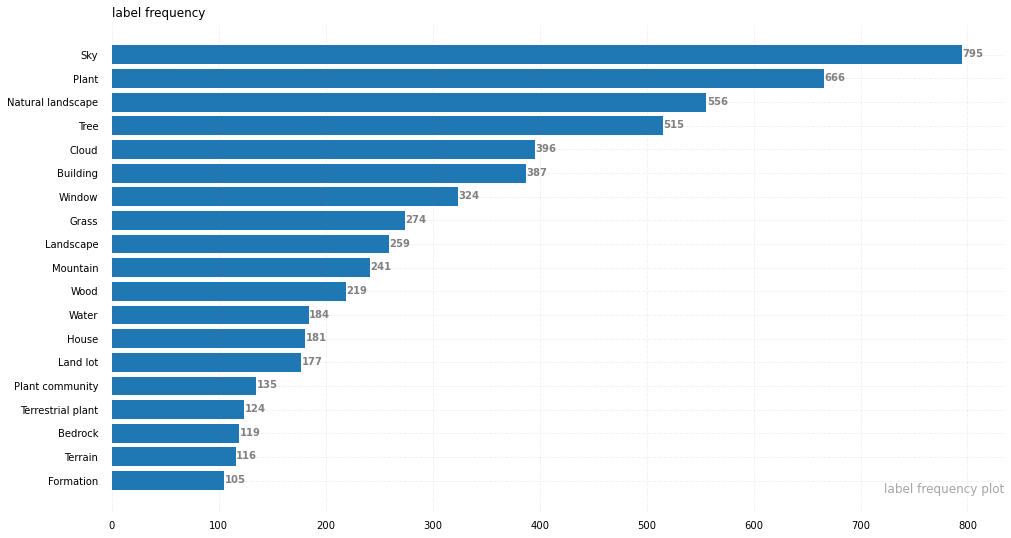

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(list(sorted_label.keys()),list(sorted_label.values()))
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('label frequency',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'label frequency plot', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

In [33]:
from gensim.models import Word2Vec, KeyedVectors
import nltk

In [34]:
model = KeyedVectors.load_word2vec_format("word2vec-google-news-300", binary = True)

In [35]:
model['urban'].shape

(300,)

In [36]:
copy = dataframe[:]
copy['image_vec'] = 1
copy

<ipython-input-36-84ac849a187d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy['image_vec'] = 1


,image_name,Natural,labels,num_label,image_vec
0,5290333715_fbe95626ae_o.jpg,2.17,"['Building(94.69%)', 'Daytime(94.46%)', 'Pro...",10,1
1,4357587050_d09069f341_o.jpg,2.00,"['Building(95.83%)', 'Window(94.71%)', 'Prop...",10,1
2,sun_audijvtzzhgkrybg.jpg,2.04,"['Daytime(94.42%)', 'Property(94.33%)', 'Sky...",10,1
3,sun_ajjodogkvthozlni.jpg,1.16,"['Sky(95.29%)', 'Building(92.38%)', 'Urban d...",10,1
4,sun_dgqyeayssxdxcaim.jpg,1.85,"['Sky(95.24%)', 'Cloud(93.56%)', 'Wood(85.84...",10,1
...,...,...,...,...,...
1098,sun_aaebuzkvqtkqiact.jpg,1.42,"['Car(96.98%)', 'Land vehicle(96.81%)', 'Sky...",10,1
1099,sun_bcgdmlmaojjqcaxq.jpg,1.08,"['Shelf(95.56%)', 'Bookcase(93.95%)', 'Shelv...",10,1
1101,sun_aphsqddlotnzlzvk.jpg,1.76,"['Cloud(96.74%)', 'Sky(96.56%)', 'Building(9...",10,1
1103,sun_bvgfkvcwscgrhenm.jpg,1.23,"['Bookcase(95.80%)', 'Furniture(95.16%)', 'T...",10,1


In [37]:
image_vec_list = []
for word_list in dataframe['labels'].values:
    image_vec = np.empty(300,)
    for word in word_list:
        labels = re.findall(r"[a-zA-Z]+", word)
        score = re.findall(r"\d\d.\d\d", word)
#         print(type(labels[0]), type(score[0]))
        try:
            image_vec += model[labels[0]] * (float(score[0])/100)
        except:
            pass
    image_vec = np.nan_to_num(image_vec,np.mean(image_vec))
    image_vec_list.append(image_vec)
dataframe['image_vec'] = image_vec_list

<ipython-input-37-072a7043e73f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['image_vec'] = image_vec_list


In [38]:
dataframe.head()

,image_name,Natural,labels,num_label,image_vec
0,5290333715_fbe95626ae_o.jpg,2.17,"['Building(94.69%)', 'Daytime(94.46%)', 'Pro...",10,"[-0.39003044669516385, 0.4208001773804426, -0...."
1,4357587050_d09069f341_o.jpg,2.00,"['Building(95.83%)', 'Window(94.71%)', 'Prop...",10,"[0.0016448663081973791, -0.028168179094791412,..."
2,sun_audijvtzzhgkrybg.jpg,2.04,"['Daytime(94.42%)', 'Property(94.33%)', 'Sky...",10,"[0.01585036120377481, 0.6225766148418188, -0.2..."
3,sun_ajjodogkvthozlni.jpg,1.16,"['Sky(95.29%)', 'Building(92.38%)', 'Urban d...",10,"[-0.16706869518384337, 0.103137182071805, -0.3..."
4,sun_dgqyeayssxdxcaim.jpg,1.85,"['Sky(95.24%)', 'Cloud(93.56%)', 'Wood(85.84...",10,"[-0.21300692623481154, 0.25347540341317654, -0..."


In [39]:
dataframe.to_csv('image_vec.csv')

In [40]:
(dataframe['image_vec'][0]-dataframe['image_vec'][1]).shape

(300,)

In [41]:
all_vec = dataframe['image_vec'].values

In [42]:
all_vec = np.stack(all_vec).astype(None)
all_new_vec = all_vec.reshape(1024,300)
all_new_vec = np.nan_to_num(all_new_vec)

In [43]:
copy = pd.DataFrame(all_new_vec)

In [44]:
copy.describe()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,1024.000000,1024.000000,1024.000000,1.024000e+03,1024.000000,1024.000000,1.024000e+03,1024.000000,1024.000000,1024.000000,...,1.024000e+03,1.024000e+03,1024.000000,1.024000e+03,1.024000e+03,1024.000000,1.024000e+03,1024.000000,1.024000e+03,1024.000000
mean,-1.886822,-45.065258,-15.530408,5.891870e+181,-41.586482,52.334783,-1.050588e+276,187.619083,159.911848,38.197877,...,1.016579e+174,9.313489e+278,-320.986710,5.678231e+249,-2.705688e+215,-265.443340,2.809488e+134,-70.035112,1.870591e+193,39.382445
std,4.775592,39.849572,14.747077,inf,33.049992,41.577014,inf,157.881132,127.674214,32.154357,...,inf,inf,265.277356,inf,inf,214.451663,2.478810e+135,54.034735,inf,32.936486
min,-13.630724,-111.051460,-73.192177,-3.353320e+02,-107.001478,-2.857989,-6.723766e+277,-1.046395,-0.459910,-1.180720,...,-1.349531e+02,-4.918802e+02,-845.165050,5.166096e-01,-1.731640e+217,-707.021078,-3.300015e+02,-201.742886,4.706803e-01,-1.561945
25%,-4.768365,-88.390590,-21.386868,-2.042067e+02,-67.733752,8.261160,5.304311e+01,47.419049,44.934957,6.462306,...,-6.259690e+01,-3.485474e+02,-552.815262,7.222429e+01,2.017685e+01,-444.954383,-1.988609e+02,-105.291434,6.622351e+01,11.492950
50%,-1.693200,-34.247708,-11.513757,-8.963368e+01,-34.495205,56.970911,1.496706e+02,132.273829,142.086932,32.172527,...,-2.316477e+01,-1.615938e+02,-250.933413,2.091291e+02,7.047403e+01,-201.371978,-9.487529e+01,-60.461203,1.949718e+02,32.542309
75%,-0.050125,-7.312373,-4.780759,-2.915649e+01,-11.895370,96.375070,3.344684e+02,322.340516,239.823866,67.298889,...,-6.719158e+00,-2.428395e+01,-78.408548,4.374123e+02,1.601115e+02,-71.885430,-4.283849e+01,-23.533563,4.384380e+02,56.581261
max,14.292617,3.909772,0.605098,3.770797e+183,1.029055,106.180171,2.441720e+232,512.449419,462.833284,105.427670,...,8.007516e+175,5.960633e+280,-0.438496,4.472699e+251,2.625407e+02,-0.018322,2.213012e+136,-0.019338,1.473450e+195,128.386833


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler().fit(all_new_vec)
all_vec_std = scaler.transform(all_new_vec)

/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1550: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


In [47]:
vec_df = pd.DataFrame(all_vec_std)

In [48]:
vec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.313579,1.142002,0.997204,-0.0,1.279352,-1.259358,0.0,-1.190464,-1.242785,-1.164499,...,-0.0,-0.0,1.206174,-0.0,0.0,1.232786,-0.113396,1.290825,-0.0,-1.203721
1,0.395635,1.130730,1.015973,-0.0,1.282755,-1.259358,0.0,-1.187065,-1.226784,-1.155154,...,-0.0,-0.0,1.202186,-0.0,0.0,1.228334,-0.113396,1.276156,-0.0,-1.215625
2,0.398611,1.147068,1.034005,-0.0,1.267705,-1.255766,0.0,-1.191241,-1.242771,-1.171430,...,0.0,-0.0,1.206979,0.0,0.0,1.233334,8.818686,1.293686,0.0,-1.197218
3,0.360289,1.134026,1.030335,-0.0,1.267832,-1.247527,0.0,-1.189225,-1.238632,-1.160290,...,0.0,-0.0,1.201198,0.0,0.0,1.229981,8.818686,1.278009,0.0,-1.200739
4,0.350665,1.137801,0.994697,-0.0,1.260286,-1.235608,0.0,-1.185061,-1.235250,-1.145722,...,0.0,-0.0,1.199403,0.0,0.0,1.225965,8.818686,1.278464,0.0,-1.213313


In [49]:
vec_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,1.024000e+03,1.024000e+03,1.024000e+03,1024.0,1.024000e+03,1.024000e+03,1024.0,1.024000e+03,1.024000e+03,1.024000e+03,...,1024.0,1024.0,1.024000e+03,1024.0,1024.0,1.024000e+03,1.024000e+03,1.024000e+03,1024.0,1.024000e+03
mean,2.406929e-17,4.604823e-15,1.279359e-17,0.0,5.147792e-16,-1.225148e-16,0.0,2.969847e-15,-1.660998e-16,2.857957e-16,...,0.0,0.0,-2.046974e-16,0.0,0.0,2.710505e-16,1.662895e-15,-2.658464e-15,0.0,9.280771e-17
std,1.000489e+00,1.000489e+00,1.000489e+00,0.0,1.000489e+00,1.000489e+00,0.0,1.000489e+00,1.000489e+00,1.000489e+00,...,0.0,0.0,1.000489e+00,0.0,0.0,1.000489e+00,1.000489e+00,1.000489e+00,0.0,1.000489e+00
min,-2.460353e+00,-1.656691e+00,-3.911958e+00,-0.0,-1.980241e+00,-1.328131e+00,0.0,-1.195568e+00,-1.256715e+00,-1.225272e+00,...,-0.0,-0.0,-1.976929e+00,-0.0,0.0,-2.060108e+00,-1.133956e-01,-2.438656e+00,-0.0,-1.243739e+00
25%,-6.036845e-01,-1.087753e+00,-3.973209e-01,-0.0,-7.915296e-01,-1.060566e+00,0.0,-8.884440e-01,-9.009891e-01,-9.874581e-01,...,-0.0,-0.0,-8.743371e-01,-0.0,0.0,-8.374790e-01,-1.133956e-01,-6.527940e-01,-0.0,-8.471797e-01
50%,4.056396e-02,2.715923e-01,2.725024e-01,-0.0,2.146670e-01,1.115615e-01,0.0,-3.507214e-01,-1.396807e-01,-1.874799e-01,...,-0.0,-0.0,2.642047e-01,-0.0,0.0,2.989143e-01,-1.133956e-01,1.772672e-01,-0.0,-2.077780e-01
75%,3.847890e-01,9.478479e-01,7.292904e-01,0.0,8.988087e-01,1.059764e+00,0.0,8.537262e-01,6.262115e-01,9.054833e-01,...,0.0,0.0,9.148790e-01,0.0,0.0,9.030123e-01,-1.133956e-01,8.610067e-01,0.0,5.224364e-01
max,3.389600e+00,1.229598e+00,1.094684e+00,-0.0,1.290057e+00,1.295709e+00,0.0,2.058441e+00,2.373772e+00,2.091867e+00,...,-0.0,-0.0,1.208942e+00,-0.0,0.0,1.238296e+00,8.818686e+00,1.296388e+00,-0.0,2.703624e+00


In [50]:
vec_df.insert(loc=0, column='Natural', value=dataframe['Natural'].values)
vec_df.head()

,Natural,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,2.17,0.313579,1.142002,0.997204,-0.0,1.279352,-1.259358,0.0,-1.190464,-1.242785,...,-0.0,-0.0,1.206174,-0.0,0.0,1.232786,-0.113396,1.290825,-0.0,-1.203721
1,2.00,0.395635,1.130730,1.015973,-0.0,1.282755,-1.259358,0.0,-1.187065,-1.226784,...,-0.0,-0.0,1.202186,-0.0,0.0,1.228334,-0.113396,1.276156,-0.0,-1.215625
2,2.04,0.398611,1.147068,1.034005,-0.0,1.267705,-1.255766,0.0,-1.191241,-1.242771,...,0.0,-0.0,1.206979,0.0,0.0,1.233334,8.818686,1.293686,0.0,-1.197218
3,1.16,0.360289,1.134026,1.030335,-0.0,1.267832,-1.247527,0.0,-1.189225,-1.238632,...,0.0,-0.0,1.201198,0.0,0.0,1.229981,8.818686,1.278009,0.0,-1.200739
4,1.85,0.350665,1.137801,0.994697,-0.0,1.260286,-1.235608,0.0,-1.185061,-1.235250,...,0.0,-0.0,1.199403,0.0,0.0,1.225965,8.818686,1.278464,0.0,-1.213313


In [51]:
vec_df.isnull().values.any()

False

In [52]:
vec_df.to_csv('all_vec.csv', header=False)

In [53]:
nature_df = dataframe[dataframe['Natural'] >= np.median(dataframe['Natural'].values)]

In [54]:
urban_df = dataframe[dataframe['Natural'] < np.median(dataframe['Natural'].values)]

In [55]:
nature_vec = np.stack(nature_df['image_vec'].values).astype(None)
nature_vec.shape

(512, 300)

In [56]:
urban_vec = np.stack(nature_df['image_vec'].values).astype(None)
urban_vec.shape

(512, 300)

In [57]:
import scipy
from scipy import stats

In [58]:
image_vec_array = np.array(image_vec_list)
eu_distance = scipy.spatial.distance_matrix(image_vec_array, image_vec_array, p=2)
eu_distance

/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/scipy/spatial/kdtree.py:52: RuntimeWarning: overflow encountered in square
  return np.sum(np.abs(y-x)**p, axis=-1)


array([[ 0.        , 15.00334031,         inf, ...,         inf,
                inf,         inf],
       [15.00334031,  0.        ,         inf, ...,         inf,
                inf,         inf],
       [        inf,         inf,  0.        , ...,         inf,
                inf,         inf],
       ...,
       [        inf,         inf,         inf, ...,  0.        ,
        16.33593497, 27.816789  ],
       [        inf,         inf,         inf, ..., 16.33593497,
         0.        , 15.96955493],
       [        inf,         inf,         inf, ..., 27.816789  ,
        15.96955493,  0.        ]])

In [59]:
np.min(image_vec_array)

-2.1645883889634178e+281

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(image_vec_array)
image_vec_std = scaler.transform(image_vec_array)

/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1550: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


In [61]:
image_vec_std.shape

(1024, 300)

In [62]:
np.isnan(np.sum(image_vec_std))

False

In [63]:
image_vec_std[~np.isnan(image_vec_std)]

array([ 0.31357854,  1.14200182,  0.99720423, ..., -2.43865602,
       -0.        ,  2.70362413])

In [64]:
np.nan_to_num(image_vec_std, copy = False)

array([[ 0.31357854,  1.14200182,  0.99720423, ...,  1.29082538,
        -0.        , -1.20372085],
       [ 0.3956347 ,  1.13072974,  1.01597262, ...,  1.27615641,
        -0.        , -1.21562534],
       [ 0.39861076,  1.14706775,  1.03400543, ...,  1.29368607,
         0.        , -1.19721763],
       ...,
       [ 1.49212594, -1.61205756, -0.05860222, ..., -2.41738301,
        -0.        ,  2.66616955],
       [ 1.3090986 , -1.636974  , -0.16164761, ..., -2.42067331,
        -0.        ,  2.68830972],
       [ 1.45426492, -1.65273507, -0.21939489, ..., -2.43865602,
        -0.        ,  2.70362413]])

In [65]:
np.isnan(image_vec_std).sum()

0

In [66]:
eu_distance = scipy.spatial.distance.pdist(all_new_vec, metric='euclidean')
eu_distance.shape

(523776,)

In [67]:
np.max(eu_distance)

inf

In [68]:
nature_distance = scipy.spatial.distance_matrix(nature_vec, nature_vec, p=2)
np.max(nature_distance)

8262.806657648394

In [69]:
stats.describe(eu_distance)

/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1082: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


DescribeResult(nobs=523776, minmax=(7.1409303348936115, inf), mean=inf, variance=nan, skewness=nan, kurtosis=nan)

In [70]:
np.median(eu_distance)

2905.113628227062

In [71]:
from matplotlib import pyplot as plt 

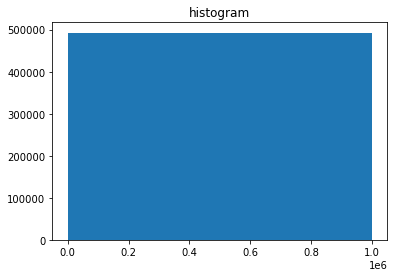

In [72]:
plt.hist(eu_distance, bins = [0,1000000]) 
plt.title("histogram") 
plt.show()